# **Propaganda Classifier Agent**

##**Dataset Downloading**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aleksrusso2001","key":"3f84f65ce31e7950b99ea4196c4ec133"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Apr 29 14:38 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle #Create the directory
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bohdanmynzar/twitter-propaganda-classification

  0% 0.00/2.24M [00:00<?, ?B/s]
100% 2.24M/2.24M [00:00<00:00, 108MB/s]


In [ ]:
!unzip twitter-propaganda-classification.zip

Archive:  twitter-propaganda-classification.zip
  inflating: twitter_dataset.csv     
  inflating: twitter_dataset_translated_ukrainian.csv  


In [ ]:
import pandas as pd

df = pd.read_csv("/content/twitter_dataset.csv")
df.head()

,Unnamed: 0,id,created_at,text,is_propaganda
0,1749,1514553915580329988,2022-04-14 10:39:27+00:00,Woman who held up poster of Marine Le Pen and ...,False
1,2409,1510803460320632839,2022-04-04 02:16:28+00:00,"⚡️Zelensky: Around 150,000 people trapped in M...",False
2,2463,1475560113536741379,2021-12-27 20:12:00+00:00,RT @natomission_ru: 🇷🇺#Russia Deputy FM Sergey...,True
3,116,1527722359314075649,2022-05-20 18:46:08+00:00,#Azovstal fully liberated – Russian military\n...,True
4,2742,1517110124325879808,2022-04-21 11:56:54+00:00,"RT @BloombergUK: ""He was almost foaming at the...",False


In [ ]:
data = df.drop(columns=['Unnamed: 0', 'id', 'created_at'])

In [ ]:
data

,text,is_propaganda
0,Woman who held up poster of Marine Le Pen and ...,False
1,"⚡️Zelensky: Around 150,000 people trapped in M...",False
2,RT @natomission_ru: 🇷🇺#Russia Deputy FM Sergey...,True
3,#Azovstal fully liberated – Russian military\n...,True
4,"RT @BloombergUK: ""He was almost foaming at the...",False
...,...,...
12985,"""There is real genocide - what you have seen h...",False
12986,⚡️ Finland imported 70% less crude oil from Ru...,False
12987,Can Congress legalise abortion if Supreme Cour...,False
12988,"RT @mod_russia: In total 2,241 Russian and for...",True


##**Agent 29.04.24**

In [ ]:
%pip install --quiet mesa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import mesa

# Data visualization tools.
import seaborn as sns

# Has multi-dimensional arrays and matrices. Has a large collection of
# mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

Epoch 1/20
325/325 [==============================] - 44s 118ms/step - loss: 0.6969 - accuracy: 0.5069 - val_loss: 0.6697 - val_accuracy: 0.7768
Epoch 2/20
325/325 [==============================] - 34s 103ms/step - loss: 0.4113 - accuracy: 0.7982 - val_loss: 0.2758 - val_accuracy: 0.8753
Epoch 3/20
325/325 [==============================] - 36s 109ms/step - loss: 0.1835 - accuracy: 0.9297 - val_loss: 0.3183 - val_accuracy: 0.8514
Epoch 4/20
325/325 [==============================] - 33s 103ms/step - loss: 0.1109 - accuracy: 0.9612 - val_loss: 0.3873 - val_accuracy: 0.8753
Epoch 5/20
325/325 [==============================] - 32s 97ms/step - loss: 0.0552 - accuracy: 0.9824 - val_loss: 0.5599 - val_accuracy: 0.8799
Epoch 6/20
325/325 [==============================] - 32s 99ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.5317 - val_accuracy: 0.8799
Epoch 7/20
325/325 [==============================] - 33s 102ms/step - loss: 0.0213 - accuracy: 0.9946 - val_loss: 0.5378 - val_accu

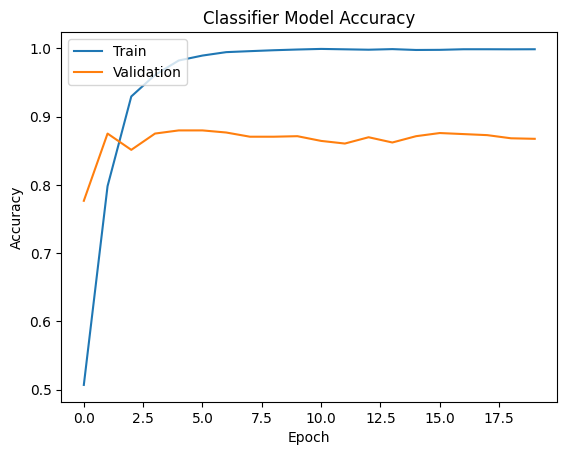

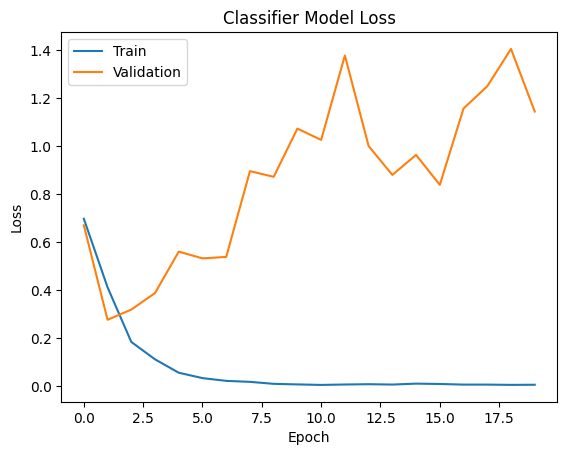

In [21]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import matplotlib.pyplot as plt

class BdiAgent(Agent):
    """An agent with beliefs, desires, and intentions."""
    def __init__(self, unique_id, model, text):
        super().__init__(unique_id, model)
        self.text = text
        self.beliefs = {}
        self.desires = []
        self.intentions = []

    def perceive(self):
        """Update beliefs based on text."""
        self.beliefs['text'] = self.text

    def select_desires(self):
        """Select desires based on beliefs."""
        # No need to select desires in this case

    def form_intentions(self):
        """Form intentions based on beliefs."""
        # No need to form intentions in this case

    def act(self):
        """Execute actions based on intentions."""
        # No need to act in this case

class BdiModel(Model):
    """A model containing BDI agents."""
    def __init__(self, N, features, labels, maxlen=200, vocab_size=10000):
        super().__init__()
        self.features = features
        self.labels = labels
        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.schedule = RandomActivation(self)
        self.initialize_classifier()

    def initialize_classifier(self):
        """Initialize and train the classifier."""
        tokenizer = Tokenizer(num_words=self.vocab_size)
        tokenizer.fit_on_texts(self.features)
        sequences = tokenizer.texts_to_sequences(self.features)
        padded_sequences = pad_sequences(sequences, maxlen=self.maxlen)
        x_train, x_val, y_train, y_val = train_test_split(padded_sequences, self.labels, test_size=0.2, random_state=42)
        x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

        embed_dim = 32
        num_heads = 2
        ff_dim = 32

        inputs = layers.Input(shape=(self.maxlen,))
        embedding_layer = TokenAndPositionEmbedding(self.maxlen, self.vocab_size, embed_dim)
        x = embedding_layer(inputs)
        transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
        x = transformer_block(x)
        x = layers.GlobalAveragePooling1D()(x)
        x = layers.Dropout(0.1)(x)
        x = layers.Dense(60, activation="relu")(x)
        x = layers.Dropout(0.1)(x)
        x = layers.Dense(40, activation="relu")(x)
        x = layers.Dropout(0.1)(x)
        x = layers.Dense(20, activation="relu")(x)
        x = layers.Dropout(0.1)(x)
        outputs = layers.Dense(2, activation="softmax")(x)

        self.classifier_model = keras.Model(inputs=inputs, outputs=outputs)
        self.classifier_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
        history = self.classifier_model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val))
        self.classifier_model.summary()

        test_loss, test_accuracy = self.classifier_model.evaluate(x_test, y_test)
        print("Test Loss:", test_loss)
        print("Test Accuracy:", test_accuracy)

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Classifier Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Classifier Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

    def step(self):
        """Advance the model by one step."""
        for agent in self.schedule.agents:
            agent.perceive()
            # No need to select desires, form intentions, or act in this case

# Example environment
features = df['text']
labels = df['is_propaganda']

# Create a BDI model with 3 agents
model = BdiModel(3, features, labels)

# Run the model for one step
model.step()


##**Agent 28.04.24**

In [ ]:
class TransformerClassifierAgent(Agent):
    def __init__(self, unique_id, model, data_frame, text_column, label_column):
        super().__init__(unique_id, model)
        self.data_frame = data_frame
        self.text_column = text_column
        self.label_column = label_column
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = model.to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-5)

    def step(self):
        # Preprocess the data
        if self.text_column not in self.data_frame.columns:
            raise KeyError(f"Text column '{self.text_column}' not found in the dataset.")
        if self.label_column not in self.data_frame.columns:
            raise KeyError(f"Label column '{self.label_column}' not found in the dataset.")

        X_train, X_test, y_train, y_test = train_test_split(
            self.data_frame[self.text_column],
            self.data_frame[self.label_column],
            test_size=0.2,
            random_state=42
        )
        train_inputs = self.tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors="pt")
        train_labels = torch.tensor(y_train.tolist())
        test_inputs = self.tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors="pt")
        test_labels = torch.tensor(y_test.tolist())

        train_data = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels)
        test_data = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

        train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
        test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

        # Training loop
        self.model.train()
        for batch in train_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(self.device), attention_mask.to(self.device), labels.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            self.optimizer.step()

        # Evaluation
        self.model.eval()
        total_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        with torch.no_grad():
            for batch in test_loader:
                input_ids, attention_mask, labels = batch
                input_ids, attention_mask, labels = input_ids.to(self.device), attention_mask.to(self.device), labels.to(self.device)
                outputs = self.model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                predictions = torch.argmax(F.softmax(logits, dim=1), dim=1)
                correct_predictions += torch.sum(predictions == labels).item()
                total_predictions += len(labels)
                loss = F.cross_entropy(logits, labels)
                total_loss += loss.item()

        accuracy = correct_predictions / total_predictions
        avg_loss = total_loss / len(test_loader)

        print(f"Accuracy: {accuracy}, Loss: {avg_loss}")

class TransformerClassifierModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, data_frame, text_column, label_column):
        super().__init__()
        self.num_agents = N
        self.schedule = RandomActivation(self)
        self.data_frame = data_frame
        self.text_column = text_column
        self.label_column = label_column
        if label_column not in data_frame.columns:
            raise KeyError(f"Label column '{label_column}' not found in the dataset.")
        num_labels = len(data_frame[label_column].unique())
        self.model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
        self.agents_ = defaultdict(dict)  # Initialize agents_ attribute
        for i in range(self.num_agents):
            agent = TransformerClassifierAgent(i, self.model, data_frame, text_column, label_column)
            self.schedule.add(agent)
            self.agents_[type(agent)][agent] = None

    def step(self):
        self.schedule.step()

# Example usage
#data = pd.read_csv("your_dataset.csv")  # Load your dataset
model = TransformerClassifierModel(1, data, "text", "is_propaganda")
model.step()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-35-59da218b4de6>:3: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


ValueError: Target size (torch.Size([16])) must be the same as input size (torch.Size([16, 2]))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from mesa import Agent, Model
from mesa.time import RandomActivation
from collections import defaultdict

class TransformerClassifierAgent(Agent):
    def __init__(self, unique_id, model, data_frame, text_column, label_column):
        super().__init__(unique_id, model)
        self.data_frame = data_frame
        self.text_column = text_column
        self.label_column = label_column
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = model.to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-5)

    def step(self):
        # Preprocess the data
        if self.text_column not in self.data_frame.columns:
            raise KeyError(f"Text column '{self.text_column}' not found in the dataset.")
        if self.label_column not in self.data_frame.columns:
            raise KeyError(f"Label column '{self.label_column}' not found in the dataset.")

        X_train, X_test, y_train, y_test = train_test_split(
            self.data_frame[self.text_column],
            self.data_frame[self.label_column],
            test_size=0.2,
            random_state=42
        )
        train_inputs = self.tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors="pt")
        train_labels = torch.tensor(y_train.tolist())
        test_inputs = self.tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors="pt")
        test_labels = torch.tensor(y_test.tolist())

        train_data = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels)
        test_data = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

        train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
        test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

        # Training loop
        self.model.train()
        for batch in train_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(self.device), attention_mask.to(self.device), labels.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            self.optimizer.step()

        # Evaluation
        self.model.eval()
        total_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        with torch.no_grad():
            for batch in test_loader:
                input_ids, attention_mask, labels = batch
                input_ids, attention_mask, labels = input_ids.to(self.device), attention_mask.to(self.device), labels.to(self.device)
                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_loss += loss.item()
                logits = outputs.logits
                predictions = torch.argmax(F.softmax(logits, dim=1), dim=1)
                correct_predictions += torch.sum(predictions == labels).item()
                total_predictions += len(labels)

        accuracy = correct_predictions / total_predictions
        avg_loss = total_loss / len(test_loader)

        print(f"Accuracy: {accuracy}, Loss: {avg_loss}")

class TransformerClassifierModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, data_frame, text_column, label_column):
        super().__init__()
        self.num_agents = N
        self.schedule = RandomActivation(self)
        self.data_frame = data_frame
        self.text_column = text_column
        self.label_column = label_column
        if label_column not in data_frame.columns:
            raise KeyError(f"Label column '{label_column}' not found in the dataset.")
        num_labels = len(data[label_column].unique())
        self.model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
        self.model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=data_frame[label_column].nunique())
        self.agents_ = defaultdict(dict)  # Initialize agents_ attribute
        for i in range(self.num_agents):
            agent = TransformerClassifierAgent(i, self.model, data_frame, text_column, label_column)
            self.schedule.add(agent)
            self.agents_[type(agent)][agent] = None

    def step(self):
        self.schedule.step()

# Example usage
#data = pd.read_csv("your_dataset.csv")  # Load your dataset
model = TransformerClassifierModel(1, data, "text", "is_propaganda")
model.step()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-34-94ba12231902>:13: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


ValueError: Target size (torch.Size([16])) must be the same as input size (torch.Size([16, 2]))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from mesa import Agent, Model
from mesa.time import RandomActivation

class TransformerClassifierAgent(Agent):
    def __init__(self, unique_id, model, data_frame, text_column, label_column):
        super().__init__(unique_id, model)
        self.data_frame = data_frame
        self.text_column = text_column
        self.label_column = label_column
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = model.to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-5)

    def step(self):
        # Preprocess the data
        X_train, X_test, y_train, y_test = train_test_split(
            self.data_frame[self.text_column],
            self.data_frame[self.label_column],
            test_size=0.2,
            random_state=42
        )
        train_inputs = self.tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors="pt")
        train_labels = torch.tensor(y_train.tolist())
        test_inputs = self.tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors="pt")
        test_labels = torch.tensor(y_test.tolist())

        train_data = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels)
        test_data = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

        train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
        test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

        # Training loop
        self.model.train()
        for batch in train_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(self.device), attention_mask.to(self.device), labels.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            self.optimizer.step()

        # Evaluation
        self.model.eval()
        total_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        with torch.no_grad():
            for batch in test_loader:
                input_ids, attention_mask, labels = batch
                input_ids, attention_mask, labels = input_ids.to(self.device), attention_mask.to(self.device), labels.to(self.device)
                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_loss += loss.item()
                logits = outputs.logits
                predictions = torch.argmax(F.softmax(logits, dim=1), dim=1)
                correct_predictions += torch.sum(predictions == labels).item()
                total_predictions += len(labels)

        accuracy = correct_predictions / total_predictions
        avg_loss = total_loss / len(test_loader)

        print(f"Accuracy: {accuracy}, Loss: {avg_loss}")

class TransformerClassifierModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, data_frame, text_column, label_column):
        super().__init__()
        self.num_agents = N
        self.schedule = RandomActivation(self)
        self.data_frame = data_frame
        self.text_column = text_column
        self.label_column = label_column
        self.model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=data_frame[label_column].nunique())
        self.agents_ = defaultdict(dict)  # Initialize agents_ attribute
        for i in range(self.num_agents):
            agent = TransformerClassifierAgent(i, self.model, data_frame, text_column, label_column)
            self.schedule.add(agent)
            self.agents_[type(agent)][agent] = None

    def step(self):
        self.schedule.step()

# Example usage
#ata = pd.read_csv("your_dataset.csv")  # Load your dataset
model = TransformerClassifierModel(1, data, "text", "label")
model.step()


KeyError: 'label'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from mesa import Agent

class TransformerClassifierAgent(Agent):
    def __init__(self, unique_id, data_frame, text_column, label_column, model_name='bert-base-uncased'):
        super().__init__(unique_id, None)
        self.data_frame = data_frame
        self.text_column = text_column
        self.label_column = label_column
        self.model_name = model_name
        self.tokenizer = BertTokenizer.from_pretrained(self.model_name)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = BertForSequenceClassification.from_pretrained(self.model_name, num_labels=self.data_frame[label_column].nunique()).to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-5)

    def step(self):
        # Preprocess the data
        X_train, X_test, y_train, y_test = train_test_split(
            self.data_frame[self.text_column],
            self.data_frame[self.label_column],
            test_size=0.2,
            random_state=42
        )
        train_inputs = self.tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors="pt")
        train_labels = torch.tensor(y_train.tolist())
        test_inputs = self.tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors="pt")
        test_labels = torch.tensor(y_test.tolist())

        train_data = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels)
        test_data = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

        train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
        test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

        # Training loop
        self.model.train()
        for batch in train_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(self.device), attention_mask.to(self.device), labels.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            self.optimizer.step()

        # Evaluation
        self.model.eval()
        total_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        with torch.no_grad():
            for batch in test_loader:
                input_ids, attention_mask, labels = batch
                input_ids, attention_mask, labels = input_ids.to(self.device), attention_mask.to(self.device), labels.to(self.device)
                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_loss += loss.item()
                logits = outputs.logits
                predictions = torch.argmax(F.softmax(logits, dim=1), dim=1)
                correct_predictions += torch.sum(predictions == labels).item()
                total_predictions += len(labels)

        accuracy = correct_predictions / total_predictions
        avg_loss = total_loss / len(test_loader)

        print(f"Accuracy: {accuracy}, Loss: {avg_loss}")

# Example usage
#data = pd.read_csv("your_dataset.csv")  # Load your dataset
agent = TransformerClassifierAgent(unique_id=1, data_frame=data, text_column="text", label_column="label")
agent.step()


AttributeError: 'NoneType' object has no attribute 'agents_'

In [ ]:
import pandas as pd
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.metrics import accuracy_score

class TransformerAgent(Agent):
    def __init__(self, unique_id, model, x_train, y_train, x_val, y_val, maxlen):
        super().__init__(unique_id, model)
        self.model = model
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.maxlen = maxlen

    def step(self):
        embed_dim = 32
        num_heads = 2
        ff_dim = 32

        transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)

        inputs = keras.Input(shape=(self.maxlen,))
        embedding_layer = TokenAndPositionEmbedding(self.maxlen, self.model.vocab_size, embed_dim)
        x = embedding_layer(inputs)
        x = transformer_block(x)
        x = keras.layers.GlobalAveragePooling1D()(x)
        x = keras.layers.Dropout(0.1)(x)
        x = keras.layers.Dense(60, activation="relu")(x)
        x = keras.layers.Dropout(0.1)(x)
        x = keras.layers.Dense(40, activation="relu")(x)
        x = keras.layers.Dropout(0.1)(x)
        x = keras.layers.Dense(20, activation="relu")(x)
        x = keras.layers.Dropout(0.1)(x)
        outputs = keras.layers.Dense(2, activation="softmax")(x)

        model = keras.Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

        history = model.fit(
            self.x_train, self.y_train, batch_size=32, epochs=20, validation_data=(self.x_val, self.y_val), verbose=0
        )

        # Evaluate the model
        val_pred = model.predict(self.x_val)
        val_pred_classes = [1 if pred[1] > pred[0] else 0 for pred in val_pred]
        val_accuracy = accuracy_score(self.y_val, val_pred_classes)
        print(f"Validation Accuracy: {val_accuracy}")

class TransformerModel(Model):
    def __init__(self, df):
        self.df = df
        self.vocab_size = 10000
        self.maxlen = 200

        # Preprocess the data
        features = self.df['text'].tolist()  # Convert DataFrame column to list
        # Convert boolean labels to integer labels
        labels = df['is_propaganda'].astype(int)

        #labels = self.df['is_propaganda'].tolist()  # Convert DataFrame column to list

        tokenizer = Tokenizer(num_words=self.vocab_size)
        tokenizer.fit_on_texts(features)

        sequences = tokenizer.texts_to_sequences(features)
        padded_sequences = pad_sequences(sequences, maxlen=self.maxlen)

        x_train, x_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
        x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

        self.data = {
            "x_train": x_train,
            "y_train": y_train,
            "x_val": x_val,
            "y_val": y_val,
            "x_test": x_test,
            "y_test": y_test,
        }

        self.schedule = RandomActivation(self)
        self.create_agents()

    def create_agents(self):
        for i in range(len(self.data['x_train'])):
            agent = TransformerAgent(i, self, self.data['x_train'][i], self.data['y_train'][i],
                                     self.data['x_val'], self.data['y_val'], self.maxlen)
            self.schedule.add(agent)

    def step(self):
        self.schedule.step()

# Load your DataFrame here
# df = pd.read_csv("your_data.csv")

model = TransformerModel(df)
for i in range(20):  # Run for 20 epochs
    model.step()


KeyError: 0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from mesa import Agent, Model
from mesa.time import RandomActivation

class TransformerClassifierAgent(Agent):
    def __init__(self, unique_id, data_frame, text_column, label_column, model_name='bert-base-uncased'):
        super().__init__(unique_id, None)
        self.data_frame = data_frame
        self.text_column = text_column
        self.label_column = label_column
        self.model_name = model_name
        self.tokenizer = BertTokenizer.from_pretrained(self.model_name)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = BertForSequenceClassification.from_pretrained(self.model_name, num_labels=self.data_frame[label_column].nunique()).to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-5)

    def step(self):
        # Preprocess the data
        X_train, X_test, y_train, y_test = train_test_split(
            self.data_frame[self.text_column],
            self.data_frame[self.label_column],
            test_size=0.2,
            random_state=42
        )
        train_inputs = self.tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors="pt")
        train_labels = torch.tensor(y_train.tolist())
        test_inputs = self.tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors="pt")
        test_labels = torch.tensor(y_test.tolist())

        train_data = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels)
        test_data = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

        train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
        test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

        # Training loop
        self.model.train()
        for batch in train_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(self.device), attention_mask.to(self.device), labels.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            self.optimizer.step()

        # Evaluation
        self.model.eval()
        total_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        with torch.no_grad():
            for batch in test_loader:
                input_ids, attention_mask, labels = batch
                input_ids, attention_mask, labels = input_ids.to(self.device), attention_mask.to(self.device), labels.to(self.device)
                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_loss += loss.item()
                logits = outputs.logits
                predictions = torch.argmax(F.softmax(logits, dim=1), dim=1)
                correct_predictions += torch.sum(predictions == labels).item()
                total_predictions += len(labels)

        accuracy = correct_predictions / total_predictions
        avg_loss = total_loss / len(test_loader)

        print(f"Accuracy: {accuracy}, Loss: {avg_loss}")

class TransformerClassifierModel(Model):
    def __init__(self, data, text_column, label_column, N):
        super().__init__()
        self.num_agents = N
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            agent = TransformerClassifierAgent(i, data, text_column, label_column)
            self.schedule.add(agent)

    def step(self):
        self.schedule.step()

# Example usage
data = pd.read_csv("your_dataset.csv")  # Load your dataset
model = TransformerClassifierModel(data, text_column="text", label_column="label", N=1)
model.step()  # Run one step (classification and evaluation)


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

———————————————————————————————————————

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = models.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
